### Importing stuff

In [16]:
# baseline cnn model for mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

### Loading the data set
* greyscale image 
* encoding 

In [17]:
def load_dataset():
    (x_train , y_train) , (x_test , y_test) = mnist.load_data()
    # grayscale image 
    trainX = x_train.reshape((x_train.shape[0], 28, 28, 1))
    testX = x_test.reshape((x_test.shape[0], 28, 28, 1))
    # print(x_train.shape[0])
    # one hot encoding the target values
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    print("loading done")
    return x_train, x_test, y_train, y_test

### Normalizing the data
* int to float
* 0 to 1 range for all pixels

In [18]:
def prep_pixels(train , test):
    # convert from int to float
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalization to 0-1 range
    train_norm /= 255.0
    test_norm /= 255.0
    print("prep done")
    return train_norm , test_norm

### Plotting the handwritten digits
* so we should try plotting a graph of all the numbs in the dataset using a function

loading done
60000


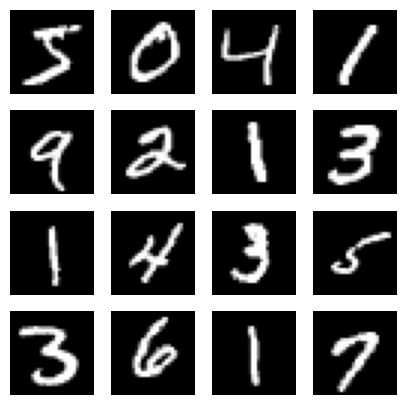

In [19]:
 x_train, x_test, y_train, y_test=load_dataset()
fig, axes = plt.subplots(4,4,figsize=(5,5))
for i in range(16):
    # plt.subplot(330 + 1 + i) #330 means that 33 means 3x3 grid and then the postions are added 
    #plt.imshow(x_train[i], cmap = plt.get_cmap('gray'))
    # a better to do the sam thing is 
    axes[i//4,i%4].imshow(x_train[i] , cmap = plt.get_cmap('gray'))
    axes[i//4, i%4].axis('off')
print(len(y_train))

plt.show()

In [20]:
def define_model():
    model = Sequential()
    model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer='he_uniform', input_shape = (28,28,1)))
    model.add(MaxPooling2D((2,2)))
    model.add(Flatten())
    model.add(Dense(100,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(10,activation='softmax'))
    #compiling the model
    opt = SGD(learning_rate=0.01,momentum=0.9)
    model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
    print("model made")

    return model

In [21]:
def evaluate_model(dataX, dataY, n_folds=5):
    scores, histories = list(), list()
    kfold = KFold(n_splits=n_folds, shuffle=True, random_state=1)
       
    for train_ix, test_ix in kfold.split(dataX):
        model = define_model()
        
        trainX, testX = dataX[train_ix], dataX[test_ix]
        trainY, testY = dataY[train_ix], dataY[test_ix]
        
        history = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=10, batch_size=32, verbose=0)
        _, acc = model.evaluate(testX, testY, verbose=0)
        print('> %.3f' % (acc * 100.0))
        scores.append(acc)
        histories.append(history)
        print("evaluation done")

    return scores, histories


In [27]:
def summarize_diagnositics(histories):
    for i in range(len(histories)):
        # plotting loss
        plt.subplot(2,1,1)
        plt.title('Cross entropy Loss')
        plt.plot(histories[i].history['loss'], color = 'blue', label= 'train')
        plt.plot(histories[i].history['val_loss'], color='red', label = 'test')
        # plotting accuracy
        plt.subplot(2,1,2)
        plt.title('Classification Accuracy')
        plt.plot(histories[i].history['accuracy'], color = 'blue', label= 'train')
        plt.plot(histories[i].history['val_accuracy'], color = 'red', label= 'test')
        plt.show()
        print("diagnostics done")

In [23]:
def summarize_performance(scores):
    print("Accuracy: mean=%.3f std=%.3f, n=%d" % (mean(scores)*100 , std(scores)*100 , len(scores)))
    plt.boxplot(scores)
    plt.show()
    print("performance done")

In [24]:
def run_test_harness():
    trainX, testX, trainY, testY = load_dataset()
    trainX, testX = prep_pixels(trainX, testX)
    scores, histories = evaluate_model(trainX, trainY)
    summarize_diagnositics(histories)
    summarize_performance(scores)
    print("algo done")

loading done
prep done
model made
> 98.600
evaluation done
model made
> 98.700
evaluation done
model made
> 98.542
evaluation done
model made
> 98.767
evaluation done
model made
> 98.817
evaluation done


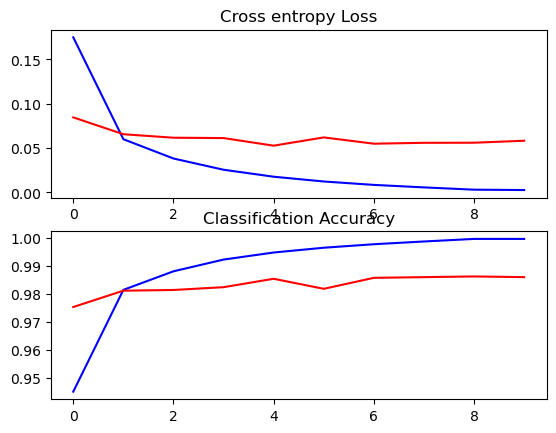

diagnostics done


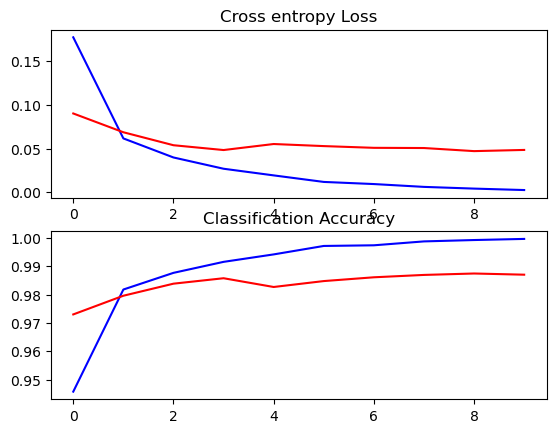

diagnostics done


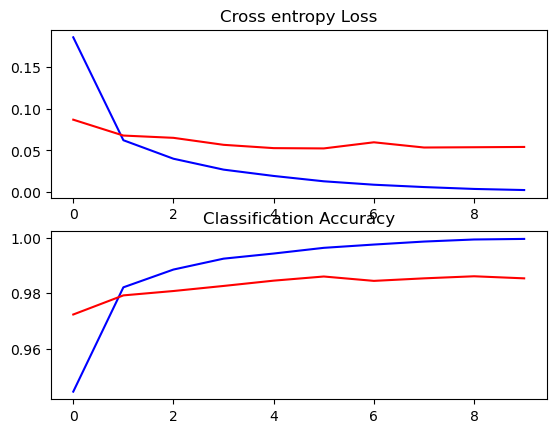

diagnostics done


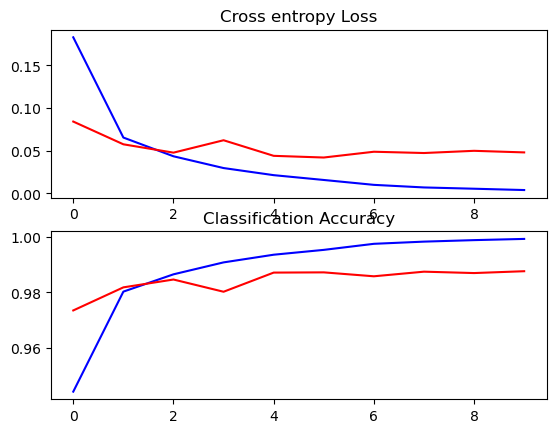

diagnostics done


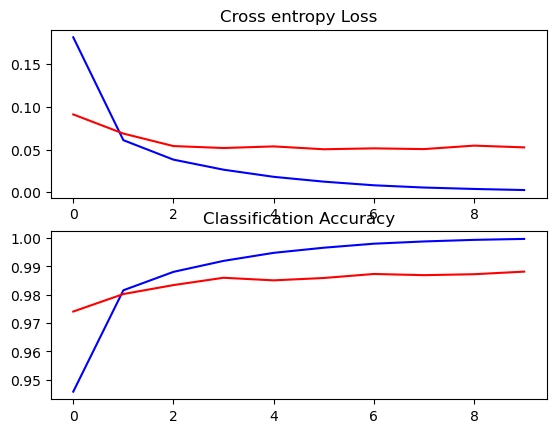

diagnostics done
Accuracy: mean=98.685 std=0.102, n=5


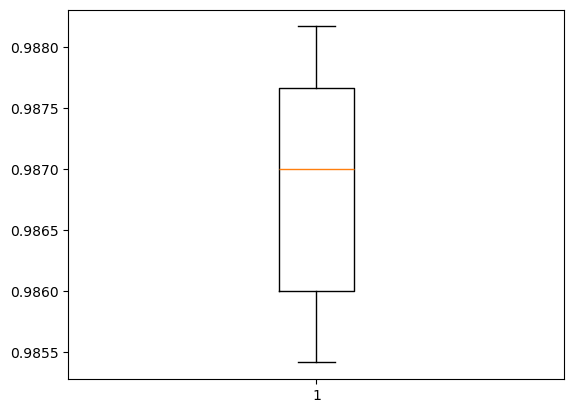

performance done
algo done


In [28]:
run_test_harness()